In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from typing import List

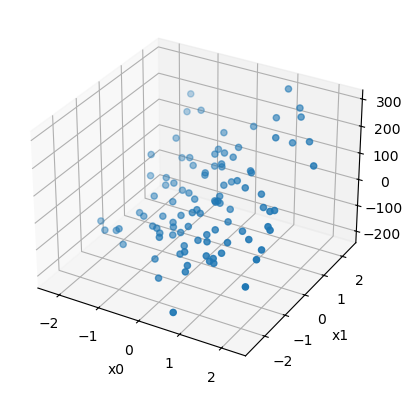

In [2]:
xs, ys = make_regression(
    n_samples=100,
    n_features=2,
    n_informative=2,
    noise=20,
    random_state=0,
)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs[:, 0], xs[:, 1], ys)

ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')

plt.show()

In [3]:
class LinearRegression:
    def __init__(self, lr: float = 0.01, n_epochs: int = 1000) -> None:
        """Initialize model.

        :param float lr: Learning rate, defaults to 0.01
        :param int n_epochs: Number of iterations, defaults to 1000
        """
        self.lr = lr
        self.n_epochs = n_epochs

    def fit(self, xs: List[List[float]], ys: List[float]) -> None:
        """Fit the model to dataset.

        :param List[List[float]] xs: x.
        :param List[float] ys: y.
        """
        xs = np.asarray(xs)
        ys = np.asarray(ys)
        n_samples, n_features = xs.shape
        # initialize weights and biases
        self.weights = np.zeros(n_features)
        self.biases = 0

        for _ in range(self.n_epochs):
            y_preds = self.predict(xs)
            error = y_preds - ys
            dw = (-2 / n_samples) * np.dot(xs.T, error)
            db = (-2 / n_samples) * np.sum(error)
            self.weights = self.weights + dw * self.lr
            self.biases = self.biases + db * self.lr

    def predict(self, xs: List[List[float]]) -> List[float]:
        """Predict.

        :param List[List[float]] xs: x.
        :return List[float]: y_pred.
        """
        xs = np.asarray(xs)
        return np.dot(xs, self.weights) + self.biases


lr = LinearRegression()
lr.fit(xs, ys)
y_preds = lr.predict(xs)

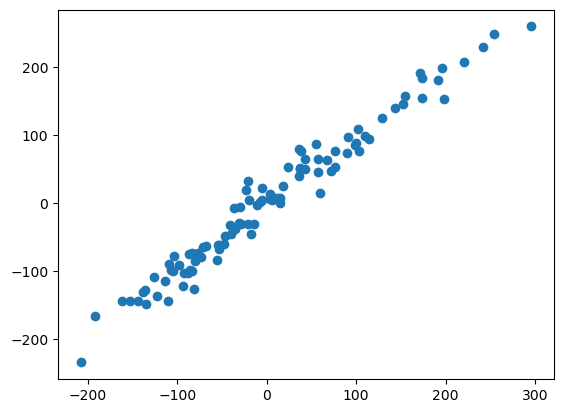

In [4]:
plt.scatter(ys, y_preds)
plt.show()

# Explaination

## How is the goodness of fit for different models?

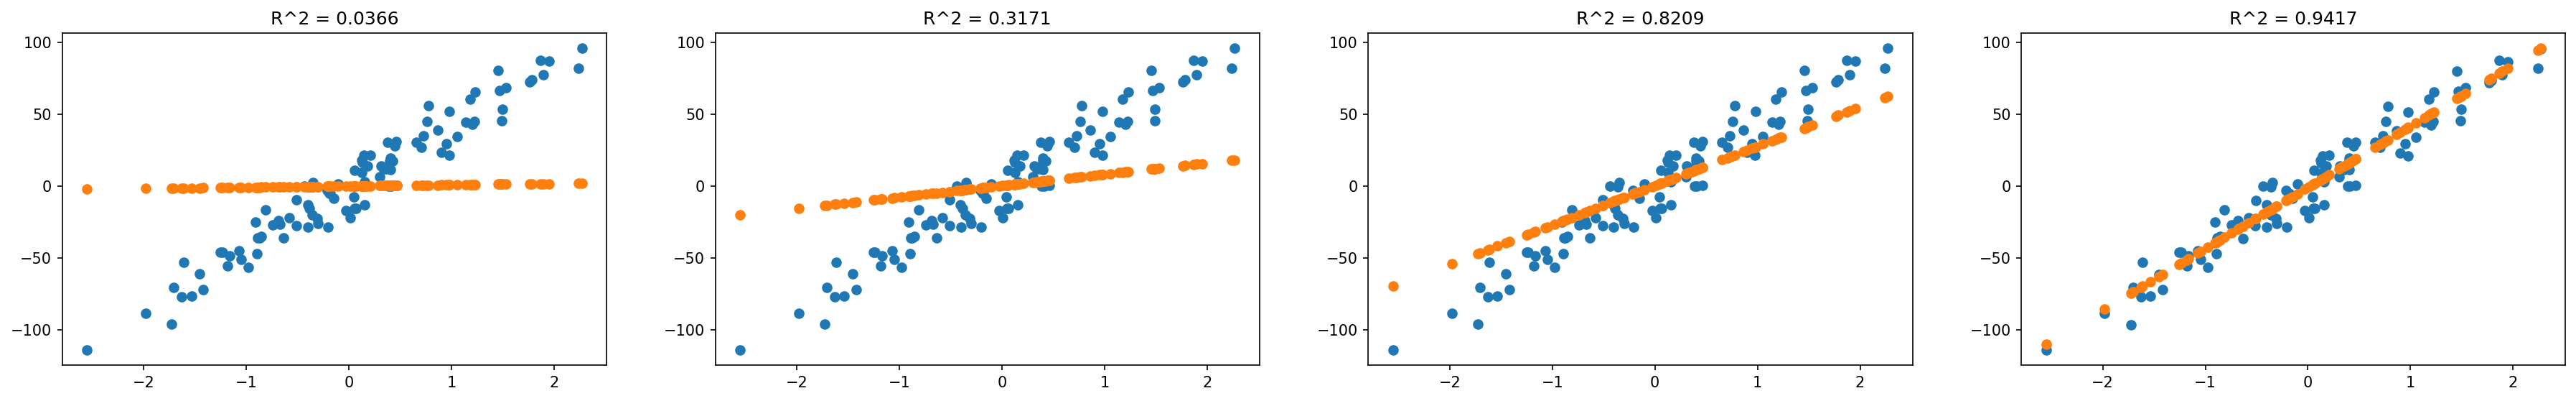

In [40]:
fig = plt.figure(figsize=(30, 4), dpi=150)

xs, ys = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    noise=10,
    random_state=0,
)

for i, epoch in enumerate([1, 10, 50, 1000]):
    ax = plt.subplot(1, 4, i+1)

    lr = LinearRegression(n_epochs=epoch)
    lr.fit(xs, ys)
    y_preds = lr.predict(xs)
    
    # calculate r-squared
    ss_residual = np.sum(np.square(ys - y_preds))
    ss_total = np.sum(np.square(ys - np.mean(ys)))
    r_squared = 1 - (ss_residual / ss_total)

    # print title
    title= f"R^2 = {r_squared:.4f}"
    ax.set_title(title)
    
    ax.scatter(xs, ys)
    ax.scatter(xs, y_preds)

plt.show()

## What's with the derivative?

In [7]:
xs = np.array([[1], [2], [3]])  # this is each sample
ys = np.array([4, 5, 6])  # this is each label
y_preds = np.array([6, 6, 6])  # this is each prediction
errors = y_preds - ys  # this is each error

print(xs)
print(errors)
print(np.dot(xs.T, errors)) # we want to multiply pair of xs and error, then sum it

[[1]
 [2]
 [3]]
[2 1 0]
[4]


Basically we multiply each x with its corresponding error like this:

In [8]:
print(xs)
print(errors)
print(np.sum([x * error for x, error in zip(xs, errors)]))

[[1]
 [2]
 [3]]
[2 1 0]
4


## How does error work?

In [9]:
np.array([1, 2, 3]) - np.array([1, 2, 3])

array([0, 0, 0])

## What does `np.zeros` do?

In [10]:
np.zeros(3)

array([0., 0., 0.])

## How to get prediction?

In [11]:
x_samples = np.asarray(
    [
        [1],
        [4],
    ]
)
x_samples.shape

(2, 1)

In [12]:
x_samples = np.asarray(
    [
        [1],
        [4],
    ]
)

weight = [2]
bias = [0.5]

np.dot(x_samples, weight) + bias

array([2.5, 8.5])

It is the same like:

In [13]:
(x_samples * weight + bias).reshape(-1)

array([2.5, 8.5])